# $\text{Exact diagonalization of the } 0 - \pi \text{ qubit Hamiltonian} - E \text{ } vs \text{ } n_{g}$

In [122]:
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from qutip import *
import math

In [123]:
#Construction of necessary elements of theta and phi Hilbert spaces

# For phi

N=20
a_phi=np.diag(np.sqrt(np.arange(1, N+1)), 1)
ad_phi=np.diag(np.sqrt(np.arange(1, N+1)), -1)
N_phi=ad_phi@a_phi
Id_N=np.eye(N+1)

# For theta

M=20
Id_M=np.eye(2*M+1)
n_theta=np.flipud(np.fliplr(np.diag(np.arange(-M,M+1), 0)))

In [124]:
# Construction of the 0-pi Hamiltonian

def Hamiltonian_0pi(EJ,ECS,ECJ,EL,n,phi,alph):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Free Hamiltonian construction
    H1=4*ECS*((n_theta-n*Id_M)@(n_theta-n*Id_M))
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_theta=np.kron(H1,Id_N)
    H_phi=np.kron(Id_M,H2)
    H_0=H_theta+H_phi
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1)
    cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2))) \
                 +(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    H_I=2*EJ*np.kron(cos_theta,cos_phi.real)
    #H_I=EJ*np.kron(cos_theta,Id_N)
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    H+=H_0-H_I
    return H

## $\text{1. Plot for } E_{Cs} = E_{Cj} = E_L = 1$, $\varphi_{ext}= \pi$, $\alpha = i \left(\frac{E_{CJ}}{E_L}\right)^{1/4} = i$.

In [125]:
#Qubit parameters 1 

phi_ext=np.pi

E_Cs=1.0
E_Cj=1.0
E_L=1.0
E_J=1.0
alpha=(1j*(E_Cj/E_L)**(1/4))

In [126]:
# Calculations 1

ng=np.arange(0.4,0.61,0.01)
Energies=[]

for n in ng:
    H=Hamiltonian_0pi(E_J,E_Cs,E_Cj,E_L,n,phi_ext,alpha)
    vals,vects=np.linalg.eigh(H)
    Energies.append(vals)

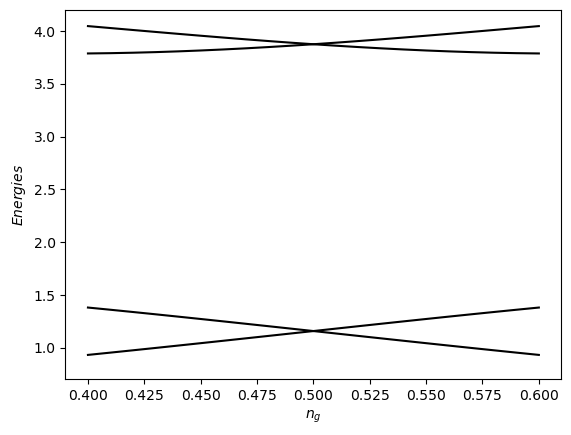

In [127]:
#Plot 1 

plt.plot(ng,Energies,c="k")
plt.ylim(0.7,4.2)
#plt.ylim(1.,4.5)
plt.xlabel('$n_g$')
plt.ylabel('$Energies$')
#plt.savefig('Energies_vs_ng_MN20.pdf')
plt.show()

## $\text{2. Plot for } E_{Cs} = \frac{1}{20}$, $E_{CJ} = 1$, $E_L = \frac{1}{16}$, $\varphi_{ext} = \pi$, $\alpha = i \left(\frac{E_{CJ}}{E_L}\right)^{1/4} = 2i$.

In [128]:
# Qubit parameters 2

E_Cs_2=(1/20)
E_Cj_2=1.0
E_L_2=(1/16)
E_J_2=(1/5)
alpha2=(1j*(E_Cj_2/E_L_2)**(1/4))

In [129]:
# Calculations 2

Energies2=[]

for n2 in ng:
    H2=Hamiltonian_0pi(E_J_2,E_Cs_2,E_Cj_2,E_L_2,n2,phi_ext,alpha2)
    vals2,vects2=np.linalg.eigh(H2)
    Energies2.append(vals2)

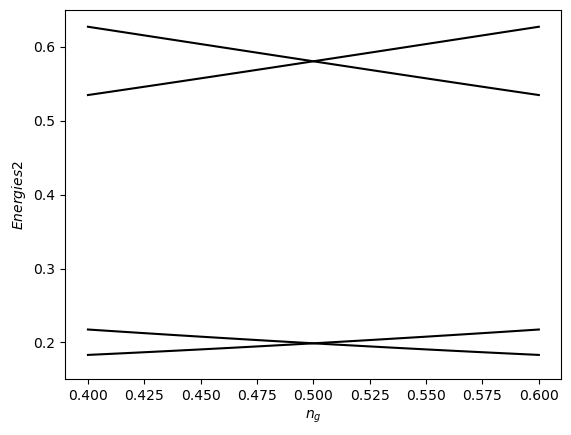

In [130]:
#Plot 2 

plt.plot(ng,Energies2,c="k")
plt.ylim(0.15,0.65)
#plt.ylim(0.2,0.8)
plt.xlabel('$n_g$')
plt.ylabel('$Energies2$')
#plt.savefig('Energies2_vs_ng_MN20.pdf')
plt.show()